# Graph Coloring Method of Districts Connection

### Project Overview

The goal of this project is to assign colors to different districts in a map such that no two adjacent districts share the same color. This problem is known as graph coloring and can be visualized using the NetworkX library in Python.

### Import Libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
np.set_printoptions(threshold=np.inf)

### Dataset Input

In [2]:
df = pd.read_excel('./Data.xlsx')

Based on this structure, the dataset can be used to construct a graph where the "Kalurahan" entities are nodes, and the edges represent connections between these nodes. Each row specifies a connection between two nodes, identified by their codes.

In [3]:
df.head(188)

,Kode Kalurahan,Kalurahan,a_i,a_j
0,1,Argodadi,1,3
1,2,Argomulyo,1,4
2,3,Argorejo,1,70
3,4,Argosari,2,3
4,5,Bangunharjo,2,4
...,...,...,...,...
70,71,Wijirejo,17,56
71,72,Wirokerten,17,66
72,73,Wonokromo,17,71
73,74,Wonolelo,18,24


### Start Graph

Adding pairs of points to the graph from the available data

In [4]:
graph = nx.Graph()

In [5]:
graph = nx.from_pandas_edgelist(df,source="a_i",target="a_j")

In [6]:
len(graph.nodes())

65

In [7]:
nx.degree(graph)

DegreeView({1: 3, 3: 4, 4: 3, 70: 4, 2: 4, 6: 8, 5: 4, 33: 1, 57: 1, 61: 1, 73: 1, 8: 6, 19: 3, 37: 2, 46: 1, 58: 1, 64: 1, 7: 2, 9: 3, 72: 2, 32: 2, 41: 2, 69: 1, 40: 1, 10: 7, 22: 1, 38: 1, 43: 1, 49: 1, 54: 1, 74: 1, 75: 1, 11: 6, 24: 2, 26: 1, 36: 1, 51: 1, 52: 1, 55: 1, 12: 6, 16: 6, 30: 3, 47: 3, 63: 2, 66: 2, 68: 2, 13: 3, 23: 1, 29: 1, 59: 1, 14: 7, 34: 1, 35: 1, 44: 1, 62: 1, 65: 1, 15: 3, 50: 2, 39: 1, 17: 8, 28: 1, 56: 1, 71: 1, 18: 2, 25: 1})

In [8]:
pd.set_option('display.max_rows', None)
pd.DataFrame(sorted(nx.degree((graph))))

,0,1
0,1,3
1,2,4
2,3,4
3,4,3
4,5,4
5,6,8
6,7,2
7,8,6
8,9,3
9,10,7


In [9]:
def visualize_graph(graph):
    # Define the layout for the graph visualization
    pos = nx.spring_layout(graph, seed=42)
    
    # Draw the nodes
    nx.draw_networkx_nodes(graph, pos, node_color='black', node_size=500)
    
    # Draw the edges
    nx.draw_networkx_edges(graph, pos, edge_color='gray')
    
    # Draw the labels (if the graph has node labels)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_labels(graph, pos, font_color='white', font_size=10)
    
    # Show the graph
    plt.axis('off')
    plt.show()

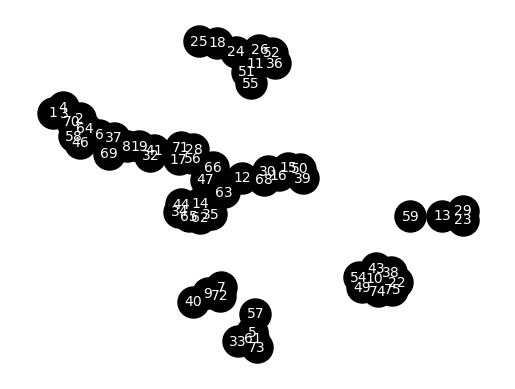

In [10]:
graph = nx.from_pandas_edgelist(df, source="a_i", target="a_j")
visualize_graph(graph)

### Graph Coloring

In [11]:
# function to calculate the number of colors needed
def calculate_number_of_colors(graph):
    # initialize an empty set to store the used colors
    used_colors = set()

    # iterate over each node in the graph
    for node in graph:
        # add the color of the node to the used_colors set
        used_colors.add(graph[node])

    # return the number of used colors
    return len(used_colors)

In [12]:
# greedy coloring function for the graph
def greedy_coloring(graph):
    # initialize an empty dictionary to store the color of each node in the graph
    node_colors = {}

    # iterate over each node in the graph
    for node in graph:
        # initialize an empty set to store the available colors for the current node
        available_colors = set(range(len(graph)))

        # iterate over the neighbors of the current node
        for neighbor in graph[node]:
            # check if the color of the neighbor is already used
            if neighbor in node_colors:
                # remove the color of the neighbor from the available_colors set
                available_colors.discard(node_colors[neighbor])

        # take the first color from the available_colors set and use it as the color of the current node
        node_colors[node] = available_colors.pop()

    # return the node_colors dictionary
    return node_colors

In [13]:
graph = nx.from_pandas_edgelist(df, source="a_i", target="a_j")

In [14]:
number_of_colors = calculate_number_of_colors(greedy_coloring(graph))

In [15]:
# display the number of colors needed
print("Number of colors needed:", number_of_colors)

# display the coloring of the graph
print("Graph coloring:", greedy_coloring(graph))

Number of colors needed: 3
Graph coloring: {1: 0, 3: 1, 4: 2, 70: 2, 2: 0, 6: 1, 5: 0, 33: 1, 57: 1, 61: 1, 73: 1, 8: 0, 19: 2, 37: 2, 46: 0, 58: 0, 64: 0, 7: 0, 9: 1, 72: 2, 32: 1, 41: 1, 69: 1, 40: 0, 10: 0, 22: 1, 38: 1, 43: 1, 49: 1, 54: 1, 74: 1, 75: 1, 11: 0, 24: 1, 26: 1, 36: 1, 51: 1, 52: 1, 55: 1, 12: 0, 16: 1, 30: 2, 47: 1, 63: 1, 66: 1, 68: 2, 13: 0, 23: 1, 29: 1, 59: 1, 14: 0, 34: 1, 35: 1, 44: 1, 62: 1, 65: 1, 15: 0, 50: 2, 39: 0, 17: 0, 28: 1, 56: 1, 71: 1, 18: 0, 25: 1}


In [16]:
# Welch Powell graph coloring function
def welch_powell_coloring(graph):
    # initialize an empty dictionary to store the color of each node in the graph
    node_colors = {}

    # sort the nodes based on their degree in descending order
    sorted_nodes = sorted(graph, key=lambda node: len(graph[node]), reverse=True)

    # initialize an empty set to store the used colors
    used_colors = set()

    # iterate over the nodes in the sorted order
    for node in sorted_nodes:
        # initialize an empty set to store the available colors for the current node
        available_colors = set(range(len(graph)))

        # iterate over the neighbors of the current node
        for neighbor in graph[node]:
            # check if the color of the neighbor is already used
            if neighbor in node_colors:
                # remove the color of the neighbor from the available_colors set
                available_colors.discard(node_colors[neighbor])

        # take the first color from the available_colors set and use it as the color of the current node
        node_colors[node] = available_colors.pop()

        # add the color of the current node to the used_colors set
        used_colors.add(node_colors[node])

    # return the node_colors dictionary
    return node_colors

In [17]:
graph = nx.from_pandas_edgelist(df, source="a_i", target="a_j")

In [18]:
number_of_colors = calculate_number_of_colors(welch_powell_coloring(graph))

In [19]:
# display the number of colors needed
print("Number of colors needed:", number_of_colors)

# display the coloring of the graph
print("Graph coloring:", welch_powell_coloring(graph))

Number of colors needed: 3
Graph coloring: {6: 0, 17: 0, 10: 0, 14: 0, 8: 1, 11: 0, 12: 0, 16: 1, 3: 0, 70: 1, 2: 2, 5: 0, 1: 2, 4: 1, 19: 2, 9: 0, 30: 2, 47: 1, 13: 0, 15: 0, 37: 2, 7: 1, 72: 2, 32: 2, 41: 2, 24: 1, 63: 1, 66: 1, 68: 2, 50: 2, 18: 0, 33: 1, 57: 1, 61: 1, 73: 1, 46: 1, 58: 1, 64: 1, 69: 0, 40: 1, 22: 1, 38: 1, 43: 1, 49: 1, 54: 1, 74: 1, 75: 1, 26: 1, 36: 1, 51: 1, 52: 1, 55: 1, 23: 1, 29: 1, 59: 1, 34: 1, 35: 1, 44: 1, 62: 1, 65: 1, 39: 0, 28: 1, 56: 1, 71: 1, 25: 1}


### Results

In [20]:
def plot_colored_graph(graph, node_colors):
    # Create a copy of the graph to avoid modifying the original graph
    colored_graph = graph.copy()

    # Assign node colors based on the provided node_colors dictionary
    for node, color in node_colors.items():
        colored_graph.nodes[node]['color'] = color

    # Get unique color values for plotting
    unique_colors = list(set(node_colors.values()))

    # Plot the colored graph
    pos = nx.spring_layout(colored_graph, seed=42, scale=100)  # Increased scale for more distance between nodes
    nx.draw(colored_graph, pos, with_labels=True, node_color=[unique_colors[color] for color in nx.get_node_attributes(colored_graph, 'color').values()], cmap=plt.cm.tab20, node_size=200)
    plt.show()

### Greedy Coloring Graph

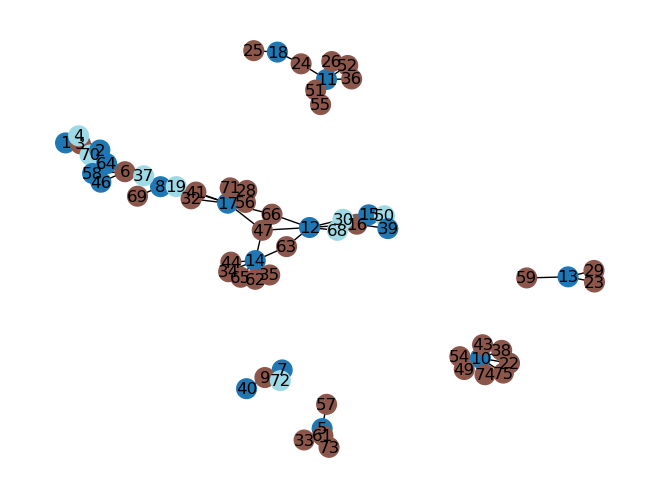

In [21]:
graph = nx.from_pandas_edgelist(df, source="a_i", target="a_j")

node_colors = greedy_coloring(graph)

plot_colored_graph(graph, node_colors)

### Welch Powell Coloring Graph

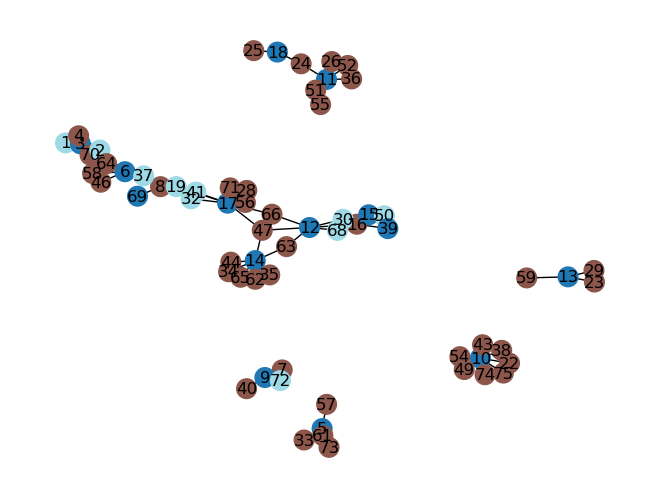

In [22]:
graph = nx.from_pandas_edgelist(df, source="a_i", target="a_j")

node_colors = welch_powell_coloring(graph)

plot_colored_graph(graph, node_colors)

### Conclusion

The difference between the greedy coloring and Welch Powell coloring results is in the assignment of colors to nodes. Both methods aim to minimize the number of colors needed to color the graph such that no adjacent nodes have the same color.

In the greedy coloring result, the colors are assigned based on the order of nodes processed. The first node is assigned the first available color, and subsequent nodes are assigned the first available color that is not used by any of their neighbors.

In the Welch Powell coloring result, the nodes are first sorted based on their degrees (number of neighbors) in descending order. Then, nodes are processed in this order and assigned the first available color that is not used by any of their neighbors.

The difference in the coloring results can be attributed to the different ordering of nodes processed by the two algorithms. The Welch Powell algorithm tends to produce better results (i.e., fewer colors needed) compared to the greedy coloring algorithm, especially for graphs with more complex structures.